<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


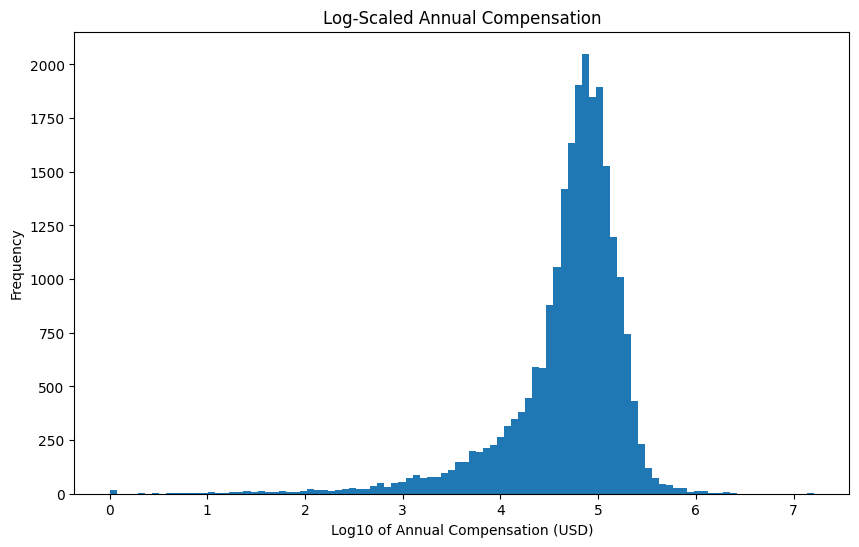

In [3]:
## Write your code here
df_comp = df[(df['ConvertedCompYearly'].notnull()) & 
                (df['ConvertedCompYearly'] > 0)].copy()

# Plot for ConvertedCompYearly
plt.figure(figsize=(10,6))
plt.hist(np.log10(df_comp['ConvertedCompYearly']), bins=100)
plt.title('Log-Scaled Annual Compensation')
plt.xlabel('Log10 of Annual Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here
# Assigning from main df
df_med = df[['Employment', 'ConvertedCompYearly']]

# Filtering employment for full timers and cleaning missing values
df_med = df_med[df_med['Employment'] == 'Employed, full-time']
df_med = df_med.dropna()

print(f'Median of yearly compansation for full time employees is: ${df_med['ConvertedCompYearly'].median()}')

Median of yearly compansation for full time employees is: $69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



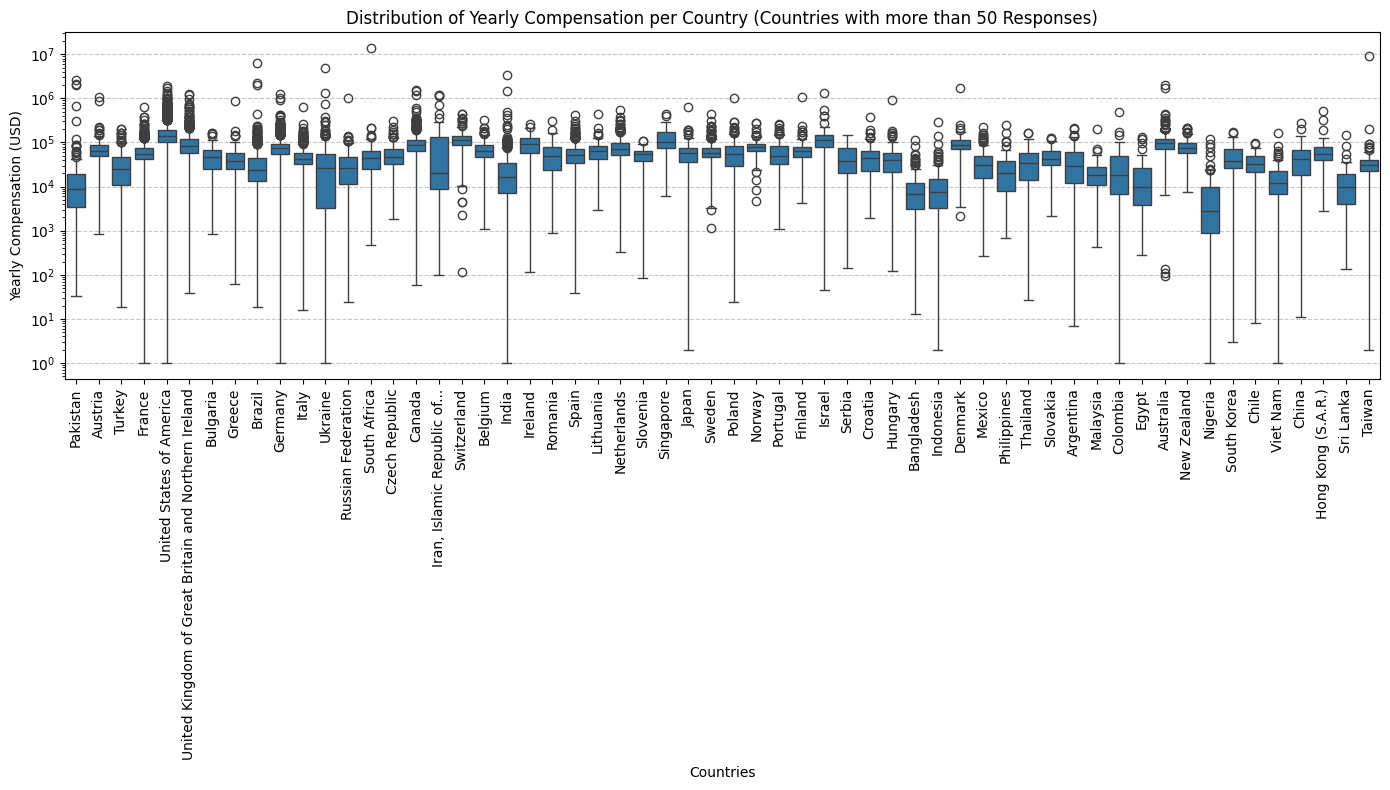

In [5]:
## Write your code here
# Assigning from main df and cleaning
df_country_comp = df[['Country', 'ConvertedCompYearly']].dropna()
country_count = df_country_comp['Country'].value_counts()
valid_countries = country_count[country_count >= 50].index

df_filtered = df_country_comp[df_country_comp['Country'].isin(valid_countries)]

plt.figure(figsize=(14,8))
sns.boxplot(
    data=df_filtered,
    x='Country',
    y='ConvertedCompYearly'
)
plt.xticks(rotation=90)
plt.title('Distribution of Yearly Compensation per Country (Countries with more than 50 Responses)')
plt.xlabel('Countries')
plt.ylabel('Yearly Compensation (USD)')
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
## Write your code here
df_copy = df.copy()
# IQR for column
comp_q1 = df_copy['ConvertedCompYearly'].quantile(0.25)
comp_q3 = df_copy['ConvertedCompYearly'].quantile(0.75)
comp_iqr = comp_q3 - comp_q1

# Computing upper and lower bounds of outliers
comp_lower = comp_q1 - (1.5 * comp_iqr)
comp_upper = comp_q3 + (1.5 * comp_iqr)

new_df = df_copy[(df_copy['ConvertedCompYearly'] > comp_lower) & (df_copy['ConvertedCompYearly'] < comp_upper)]
print('Total remaining rows after removing outlier from year compensation is:', len(new_df))
new_df

Total remaining rows after removing outlier from year compensation is: 22457


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41179,41180,I am a developer by profession,25-34 years old,"Employed, full-time;Employed, part-time",Remote,Apples,Contribute to open-source projects;Bootstrappi...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Stack Overflow;Coding ...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,15600.0,NaN
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,44640.0,NaN
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,20.0,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0
41185,41186,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,116844.0,NaN


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Pearson correlation: 
                      ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.408438       -0.058170
WorkExp                         0.408438  1.000000       -0.032388
JobSatPoints_1                 -0.058170 -0.032388        1.000000

Spearman correlation: 
                      ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.471187        0.025199
WorkExp                         0.471187  1.000000        0.044651
JobSatPoints_1                  0.025199  0.044651        1.000000



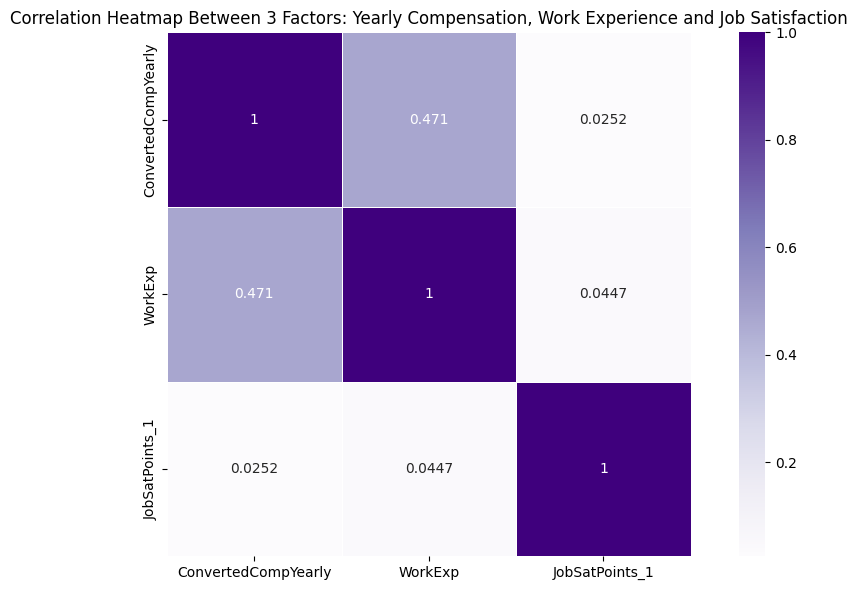

In [7]:
## Write your code here
df_comp_exp_sat = new_df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]

# Finding correlations between data
pearson_corr = df_comp_exp_sat.corr()
spearman_corr = df_comp_exp_sat.corr(method='spearman')
print('Pearson correlation: \n', pearson_corr)
print('\nSpearman correlation: \n', spearman_corr)

print()
plt.figure(figsize=(10,6))
sns.heatmap(spearman_corr, annot=True, fmt='.3g', cmap='Purples', linewidth=0.5, square=True)
plt.title('Correlation Heatmap Between 3 Factors: Yearly Compensation, Work Experience and Job Satisfaction')
plt.tight_layout()
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


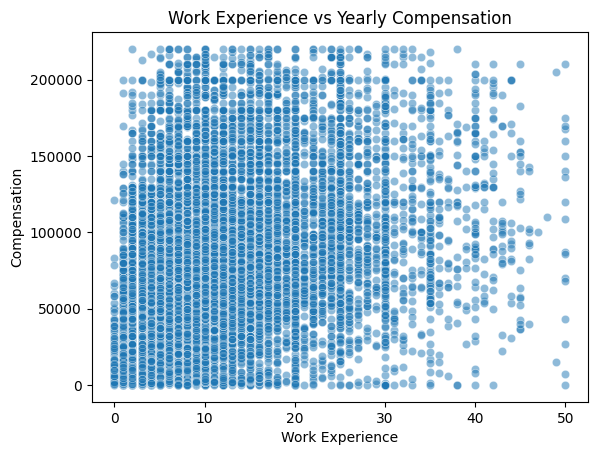

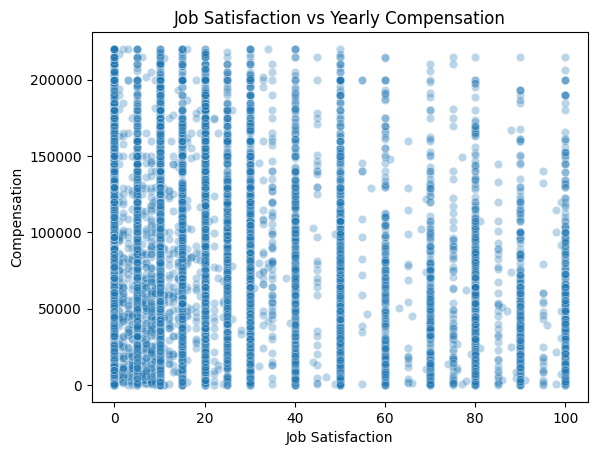

In [8]:
## Write your code here
# Plotting scatter for Comp and Exp
sns.scatterplot(
    data=df_comp_exp_sat[['ConvertedCompYearly', 'WorkExp']],
    x='WorkExp',
    y='ConvertedCompYearly',
    alpha= 0.5
)

plt.title('Work Experience vs Yearly Compensation')
plt.xlabel('Work Experience')
plt.ylabel('Compensation')
plt.show()

print()

# Plotting scatter for Comp and JobSat
sns.scatterplot(
    data=df_comp_exp_sat[['ConvertedCompYearly', 'JobSatPoints_1']],
    x='JobSatPoints_1',
    y='ConvertedCompYearly',
    alpha= 0.3
)

plt.title('Job Satisfaction vs Yearly Compensation')
plt.xlabel('Job Satisfaction')
plt.ylabel('Compensation')
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
